Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 48)     │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 96)     │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │       752,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 796,458 (3.04 MB)

 Trainable params: 796,458 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9345 - loss: 0.2086 - val_accuracy: 0.9828 - val_loss: 0.0607
Epoch 2/6
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy: 0.9866 - val_loss: 0.0450
Epoch 3/6
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9851 - loss: 0.0476 - val_accuracy: 0.9903 - val_loss: 0.0345
Epoch 4/6
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9884 - loss: 0.0363 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 5/6
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9888 - loss: 0.0337 - val_accuracy: 0.9908 - val_loss: 0.0362
Epoch 6/6
399/399 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9923 - val_loss: 0.0300
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9919 - loss: 0.0242
Test Accuracy: 99.19%


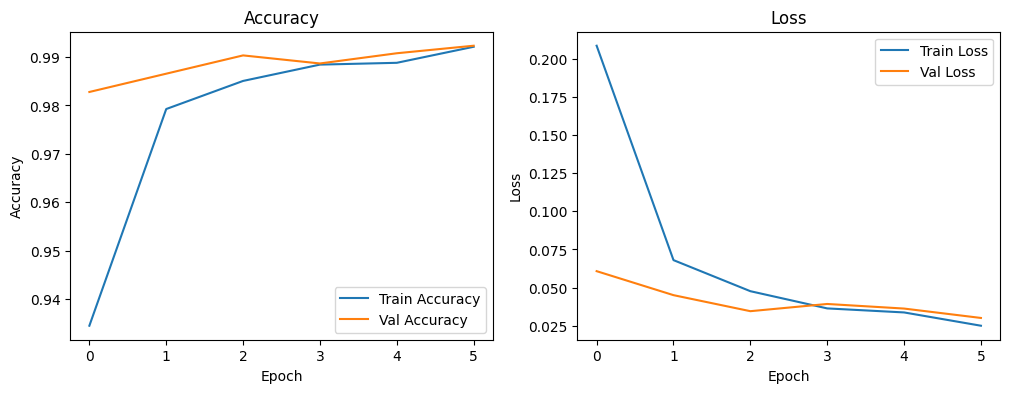

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

np.random.seed(7)
X_train = X_train.astype('float32') / 255.0 + np.random.normal(0, 0.02, X_train.shape)
X_test = X_test.astype('float32') / 255.0 + np.random.normal(0, 0.02, X_test.shape)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(160, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0015), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_split=0.15, epochs=6, batch_size=128)
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
